In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
df_country = pd.read_csv('../input/Country.csv')
df_indicators = pd.read_csv('../input/Indicators.csv')
df_indicators.describe()

Country.csv
CountryNotes.csv
Footnotes.csv
Indicators.csv
Series.csv
SeriesNotes.csv
database.sqlite
hashes.txt



,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dat = df_indicators.copy()
dat.shape

(5656458, 6)

In [4]:
dat.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
dat.dtypes

CountryName       object
CountryCode       object
IndicatorName     object
IndicatorCode     object
Year               int64
Value            float64
dtype: object

Let's take a look at forest area (sq. km) indicator (AG.LND.FRST.K2). How much forest have we lost since 1960?

In [6]:
# helper function
def filter_data(df, feat, filter0, reset_index=False):
    d = df[df[feat]==filter0]
    if reset_index:
        d.reset_index(inplace=True, drop=True)
    return d

In [7]:
forest_area = filter_data(dat, 'IndicatorCode', 'AG.LND.FRST.K2', reset_index=True)
forest_area.tail(15)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5416,Uganda,UGA,Forest area (sq. km),AG.LND.FRST.K2,2012,28116.0
5417,Ukraine,UKR,Forest area (sq. km),AG.LND.FRST.K2,2012,97570.0
5418,United Arab Emirates,ARE,Forest area (sq. km),AG.LND.FRST.K2,2012,3194.2
5419,United Kingdom,GBR,Forest area (sq. km),AG.LND.FRST.K2,2012,28954.0
5420,United States,USA,Forest area (sq. km),AG.LND.FRST.K2,2012,3047876.0
5421,Uruguay,URY,Forest area (sq. km),AG.LND.FRST.K2,2012,18336.0
5422,Uzbekistan,UZB,Forest area (sq. km),AG.LND.FRST.K2,2012,32677.0
5423,Vanuatu,VUT,Forest area (sq. km),AG.LND.FRST.K2,2012,4400.0
5424,"Venezuela, RB",VEN,Forest area (sq. km),AG.LND.FRST.K2,2012,456998.0
5425,Vietnam,VNM,Forest area (sq. km),AG.LND.FRST.K2,2012,140850.0


Let's see U.S. data

In [8]:
us = filter_data(forest_area, 'CountryName', 'United States', True)
us

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,United States,USA,Forest area (sq. km),AG.LND.FRST.K2,1990,2963350.0
1,United States,USA,Forest area (sq. km),AG.LND.FRST.K2,1991,2967210.0
2,United States,USA,Forest area (sq. km),AG.LND.FRST.K2,1992,2971070.0
3,United States,USA,Forest area (sq. km),AG.LND.FRST.K2,1993,2974930.0
4,United States,USA,Forest area (sq. km),AG.LND.FRST.K2,1994,2978790.0
5,United States,USA,Forest area (sq. km),AG.LND.FRST.K2,1995,2982650.0
6,United States,USA,Forest area (sq. km),AG.LND.FRST.K2,1996,2986510.0
7,United States,USA,Forest area (sq. km),AG.LND.FRST.K2,1997,2990370.0
8,United States,USA,Forest area (sq. km),AG.LND.FRST.K2,1998,2994230.0
9,United States,USA,Forest area (sq. km),AG.LND.FRST.K2,1999,2998090.0


Ok. We have data for 23 years, from 1990 to 2012. Let's dive in!

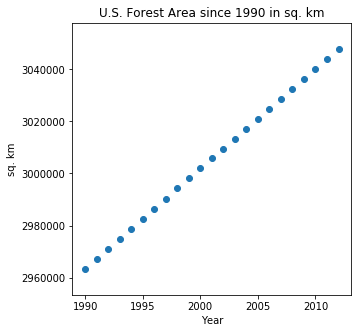

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(us.Year, us.Value) 
plt.ylim(us.Value.min()-10000, us.Value.max()+10000)
plt.title('U.S. Forest Area since 1990 in sq. km')
plt.xlabel('Year')
plt.ylabel('sq. km')
plt.show()

Looks like U.S. has had decent reforestation rate from early 90s, very linear. In contrast if we look at Brazil we see:

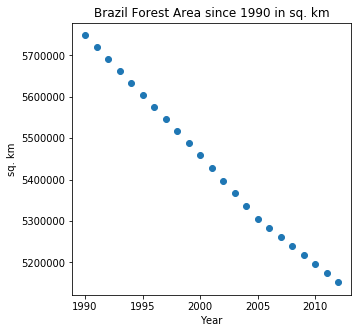

In [10]:
brazil = filter_data(forest_area, 'CountryName', 'Brazil', True)
plt.figure(figsize=(5,5))
plt.scatter(brazil.Year, brazil.Value)
plt.title('Brazil Forest Area since 1990 in sq. km')
plt.xlabel('Year')
plt.ylabel('sq. km')
plt.show()

Brazil has had a lot of deforestation, which has been much covered with the countries affinity for beef.

In [11]:
# import plotly.tools
# import plotly.plotly as py
# import plotly.graph_objs as go
# plotly.tools.set_credentials_file(#username=USER_NAME, api_key=API_KEY)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [12]:
forest_1990 = filter_data(forest_area, 'Year', 1990)
forest_2012 = filter_data(forest_area, 'Year', 2012)

In [13]:
print('1990 Countries: ', forest_1990.shape[0])
print('2012 Countries: ', forest_2012.shape[0])

1990 Countries:  239
2012 Countries:  238


#### hmm

In [14]:
for country in forest_1990.CountryName:
    if country not in forest_1990.CountryName:
        print(country)
        break

Arab World


In [15]:
forest_1990 = forest_1990[forest_1990.CountryName != 'Arab World']
print('1990 Countries: ', forest_1990.shape[0])

1990 Countries:  238


In [16]:
forest_merged = pd.merge(forest_1990, forest_2012, how='left', on=['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'],
                     suffixes=('1990','2012'))
forest_merged.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year1990,Value1990,Year2012,Value2012
0,Caribbean small states,CSS,Forest area (sq. km),AG.LND.FRST.K2,1990,328330.5,2012.0,325699.3
1,Central Europe and the Baltics,CEB,Forest area (sq. km),AG.LND.FRST.K2,1990,351770.0,2012.0,376490.0
2,East Asia & Pacific (all income levels),EAS,Forest area (sq. km),AG.LND.FRST.K2,1990,6550932.2,2012.0,6608271.6
3,East Asia & Pacific (developing only),EAP,Forest area (sq. km),AG.LND.FRST.K2,1990,4601840.4,2012.0,4724789.9
4,Euro area,EMU,Forest area (sq. km),AG.LND.FRST.K2,1990,910298.0,2012.0,1014379.6


In [17]:
forest_merged['DifferenceValue'] = forest_merged['Value2012'] - forest_merged['Value1990']
forest_merged.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year1990,Value1990,Year2012,Value2012,DifferenceValue
0,Caribbean small states,CSS,Forest area (sq. km),AG.LND.FRST.K2,1990,328330.5,2012.0,325699.3,-2631.2
1,Central Europe and the Baltics,CEB,Forest area (sq. km),AG.LND.FRST.K2,1990,351770.0,2012.0,376490.0,24720.0
2,East Asia & Pacific (all income levels),EAS,Forest area (sq. km),AG.LND.FRST.K2,1990,6550932.2,2012.0,6608271.6,57339.4
3,East Asia & Pacific (developing only),EAP,Forest area (sq. km),AG.LND.FRST.K2,1990,4601840.4,2012.0,4724789.9,122949.5
4,Euro area,EMU,Forest area (sq. km),AG.LND.FRST.K2,1990,910298.0,2012.0,1014379.6,104081.6


In [18]:
## Bunch of the first rows are aggregates, let's get rid of these for now
forest_merged[:50]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year1990,Value1990,Year2012,Value2012,DifferenceValue
0,Caribbean small states,CSS,Forest area (sq. km),AG.LND.FRST.K2,1990,328330.5,2012.0,325699.3,-2631.2
1,Central Europe and the Baltics,CEB,Forest area (sq. km),AG.LND.FRST.K2,1990,351770.0,2012.0,376490.0,24720.0
2,East Asia & Pacific (all income levels),EAS,Forest area (sq. km),AG.LND.FRST.K2,1990,6550932.2,2012.0,6608271.6,57339.4
3,East Asia & Pacific (developing only),EAP,Forest area (sq. km),AG.LND.FRST.K2,1990,4601840.4,2012.0,4724789.9,122949.5
4,Euro area,EMU,Forest area (sq. km),AG.LND.FRST.K2,1990,910298.0,2012.0,1014379.6,104081.6
5,Europe & Central Asia (all income levels),ECS,Forest area (sq. km),AG.LND.FRST.K2,1990,10152122.6,2012.0,10342957.4,190834.8
6,Europe & Central Asia (developing only),ECA,Forest area (sq. km),AG.LND.FRST.K2,1990,594180.0,2012.0,644485.0,50305.0
7,European Union,EUU,Forest area (sq. km),AG.LND.FRST.K2,1990,1462258.0,2012.0,1597945.6,135687.6
8,Fragile and conflict affected situations,FCS,Forest area (sq. km),AG.LND.FRST.K2,1990,4030936.3,2012.0,2956026.0,-1074910.3
9,Heavily indebted poor countries (HIPC),HPC,Forest area (sq. km),AG.LND.FRST.K2,1990,6742239.0,2012.0,5334266.0,-1407973.0


In [19]:
## first 31 are aggragates, will filter out when visualizing.
trace = dict(type='choropleth',
            locations = forest_merged['CountryCode'],
                      z = forest_merged['DifferenceValue'],
                      text = forest_merged['CountryName'],
                      colorscale = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], 
                                    [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'],
                                    [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], 
                                    [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], 
                                    [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']],
                      autocolorscale = False,
                      reversescale = False,
                      marker = dict(line = dict (color = 'rgb(180,180,180)',width = 0.5) ),
                      colorbar = dict(autotick = True, title = 'Gain / Loss'),
                      zauto = False,#True,
                      zmin=forest_merged[32:]['DifferenceValue'].min()-1000,
                      zmax=forest_merged[32:]['DifferenceValue'].max()+1000)
data = [trace]

layout = dict(
    title = 'Forest Area Gain/Loss Since 1960',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(type = 'Mercator')
    )
)
[0.034482758620689655, 'rgb(165,42,42)'],
# py.iplot(colorscale_plot(colorscale=chlorophyll, title='Chlorophyll'))

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='forest gain-world-map' )

Brazil and China clearly outliers here. I knew about Brazil's deforestation, but did not realize China's reforestation efforts, wow. Let's remove these two to get better view of the rest of the world.

In [20]:
forest_merge2 = forest_merged[(forest_merged.CountryName != 'Brazil') & (forest_merged.CountryName != 'China')][32:].reset_index(drop=True)
# this puts holes in the map, let's change china and brazil to NULLs
forest_merge2 = forest_merged.loc[32:,:].reset_index(drop=True)
forest_merge2.loc[forest_merge2.CountryName == 'Brazil', 'DifferenceValue'] = np.NaN #Brazil
forest_merge2.loc[forest_merge2.CountryName == 'China', 'DifferenceValue'] = np.NaN #China

In [21]:
## COLOR Scale; can be ignored
## converting hex to rbg int('b4', 16) ==> 180
import re
colors = '#a52a2a #a23029 #9f3628 #9c3b28 #994027 #954426 #934725 #8f4b24 #8b4f23 #885222 #845521 #815820 #7d5b1f #7b5d1e #75601c #71631b #6b6619 #696819 #636a17 #5f6d16 #5b6f14 #567013 #507311 #4a740f #44760d #3c790b #337a08 #287d05 #187e02 #008000'.split()
colors_rgb = [0]*len(colors)
for idx, h in enumerate(colors):
    rgb = 'rgb('
    for i in re.findall('..', h.lstrip('#')):
        rgb += str(int(i,16))+','
    colors_rgb[idx] = rgb[:-1]+')'
# colors_rgb = ['rgb(str(for h in colors for i in re.findall('..', h.lstrip('#'))]
# re.findall('..',hex)
c_scale = [[i/(len(colors_rgb)-1),colors_rgb[i-1]] for i in range(1,len(colors_rgb)+1)]

c_scale.insert(0,[0.0,0])
# c_scale[:-1]

In [22]:
c_scale = [[i/(len(colors_rgb)-1),colors_rgb[i-1]] for i in range(1,len(colors_rgb))]
c_scale.insert(0,[0,0])

trace = dict(type='choropleth',
            locations = forest_merged['CountryCode'],
                      z = forest_merged['DifferenceValue'],
                      text = forest_merged['CountryName'],
                      colorscale = 'Greens',
                      autocolorscale = False,
                      reversescale = True,
                      marker = dict(line = dict (color = 'rgb(180,180,180)',width = 0.5) ),
                      colorbar = dict(autotick = True, title = 'Gain / Loss'),
                      zauto = False,#True,
                      zmin=forest_merged[32:].loc[((forest_merged.CountryName!='Indonesia')&(forest_merged.CountryName!='Brazil')),\
                                          'DifferenceValue'].min(),
                      zmax=forest_merged[32:].loc[((forest_merged.CountryName!='United States')&(forest_merged.CountryName!='China')),\
                                          'DifferenceValue'].max()+25000)
data = [trace]

layout = dict(
    title = 'Forest Area Gain/Loss Since 1960',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(type = 'Mercator')
    )
)

# py.iplot(colorscale_plot(colorscale=chlorophyll, title='Chlorophyll'))

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='forest gain-world-map without')# china-or-brazil' )

US and China leading the world in reforestation efforts, with Brazil and Indonesia doing some real damage to their forests in the past couple decades. Summary stats:

In [23]:
## Countries with largest gains and losses
biggest_loser = forest_merged[forest_merged.DifferenceValue == forest_merged[32:]['DifferenceValue'].min()].get(['CountryName', 'DifferenceValue']).values
biggest_gainer = forest_merged[forest_merged.DifferenceValue == forest_merged[32:]['DifferenceValue'].max()].get(['CountryName', 'DifferenceValue']).values
print('{} lost {:.2f} square KM of forest\n{} gained {:.2f} sq. KM of forest since 1990 (to 2012)'.format(biggest_loser[0][0],
                                                                                                  abs(biggest_loser[0][1]),
                                                                                                  biggest_gainer[0][0],
                                                                                                  biggest_gainer[0][1]))

Brazil lost 597058.00 square KM of forest
China gained 552466.80 sq. KM of forest since 1990 (to 2012)


If we base it on percentage of total land, Indonesia blows Brazil out of the water, with palm oil being the main driver in Indonesia. Takeaway: Avoid palm oil and beef. And look into China's impressive efforts!